In [16]:
import numpy as np
from matplotlib import pyplot as plt


In [28]:
en_file = "MgHp/mghp_qedcasci_8_10_cc_pVDZ_pes_6_states_only_singlets_50_points.npy_pes.npy"
en2_file = "MgHp/mghp_casci_10_12_cc_pVDZ_pes_6_states_only_singlets_50_points.npy_pes.npy"
qed_file = "MgHp/mghp_qedcasci_10_12_cc_pVDZ_pes_6_states_only_singlets_50_points.npy_pes.npy"


In [29]:
en = np.load(en2_file)
qeden = np.load(qed_file)
print(np.shape(en))

(7, 50)


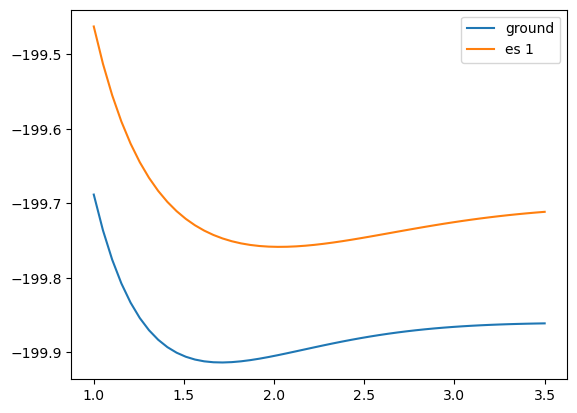

In [19]:
plt.plot(en[0,:], en[1,:], label="ground")
plt.plot(en[0,:], en[2,:], label="es 1")
#plt.plot(en[0,:30], en[3,:30], label="es 2")
#plt.plot(en[0,:30], en[4,:30], label="es 3")
plt.legend()
plt.show()


In [5]:
import numpy as np
import psi4
psi4.core.set_output_file("mghp.out")

In [6]:
mol_str = """
Mg
H 1 2.2
symmetry c1
1 1
"""
mol_tmpl = """
Mg
H 1 **R**
symmetry c1
1 1
"""

In [7]:
rs = np.linspace(1.1, 3.5, 25)

options_dict = {
    "basis": "cc-pVDZ",
    "scf_type": "pk",
    "e_convergence": 1e-10,
    "d_convergence": 1e-10,
    "frozen_docc" : [2],
    "active" : [12],
#    "active" : [8, 0, 3, 3],
    "num_roots" : 3
}
#    'num_roots' : 6,
#    'frozen_docc' : [28],
#    'active' : [12],
#    'TDM' :  True,
#    'OPDM': True,
#    'dipmom' : True
#}

mol = psi4.geometry(mol_str)
psi4.set_options(options_dict)
scf_e, wfn = psi4.energy('SCF', return_wfn=True)
fci_energy, wfn = psi4.energy('fci',ref_wfn=wfn, return_wfn=True)

In [8]:
scf_e = []
eg_8_12 = []
e1_8_12 = []
e2_8_12 = []
for r_val in rs:
    mol_str = mol_tmpl.replace("**R**", str(r_val))
    print(mol_str)
    mol = psi4.geometry(mol_str)
    scfe, wfn = psi4.energy('SCF', return_wfn=True, molecule=mol)
    scf_e.append(scfe)
    ci_e, wfn = psi4.energy('fci',ref_wfn=wfn, return_wfn=True)
    eg_8_12.append(wfn.variable("CI ROOT 0 TOTAL ENERGY"))
    e1_8_12.append(wfn.variable("CI ROOT 1 TOTAL ENERGY"))
    e2_8_12.append(wfn.variable("CI ROOT 2 TOTAL ENERGY"))



Mg
H 1 1.1
symmetry c1
1 1


Mg
H 1 1.2000000000000002
symmetry c1
1 1


Mg
H 1 1.3
symmetry c1
1 1


Mg
H 1 1.4000000000000001
symmetry c1
1 1


Mg
H 1 1.5
symmetry c1
1 1


Mg
H 1 1.6
symmetry c1
1 1


Mg
H 1 1.7000000000000002
symmetry c1
1 1


Mg
H 1 1.8
symmetry c1
1 1


Mg
H 1 1.9
symmetry c1
1 1


Mg
H 1 2.0
symmetry c1
1 1


Mg
H 1 2.1
symmetry c1
1 1


Mg
H 1 2.2
symmetry c1
1 1


Mg
H 1 2.3
symmetry c1
1 1


Mg
H 1 2.4
symmetry c1
1 1


Mg
H 1 2.5
symmetry c1
1 1


Mg
H 1 2.5999999999999996
symmetry c1
1 1


Mg
H 1 2.7
symmetry c1
1 1


Mg
H 1 2.8
symmetry c1
1 1


Mg
H 1 2.9
symmetry c1
1 1


Mg
H 1 3.0
symmetry c1
1 1


Mg
H 1 3.0999999999999996
symmetry c1
1 1


Mg
H 1 3.1999999999999997
symmetry c1
1 1


Mg
H 1 3.3
symmetry c1
1 1


Mg
H 1 3.4
symmetry c1
1 1


Mg
H 1 3.5
symmetry c1
1 1



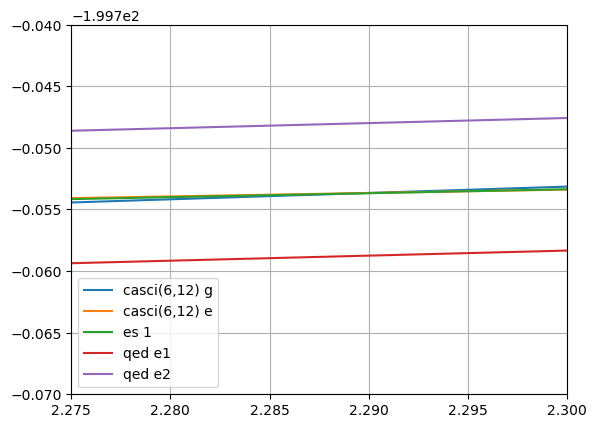

In [35]:
plt.plot(rs, np.array(eg_8_12)+0.136, label="casci(6,12) g")
#plt.plot(rs, eg_10_12, label="casci(10,12) g")
#plt.plot(rs, eg_10_14, label="casci(10,14) g")
plt.plot(rs, e1_8_12, label="casci(6,12) e")
#plt.plot(rs, e1_10_12, label="casci(10,12) e")
#plt.plot(rs, e1_10_14, label="casci(10,14) e")
#plt.plot(en[0,:], en[1,:], 'r--', label="ground")
plt.plot(en[0,:], en[2,:], label="es 1")
#plt.plot(qeden[0,:], qeden[1,:], label="qed g")
plt.plot(qeden[0,:], qeden[2,:], label="qed e1")
plt.plot(qeden[0,:], qeden[3,:], label="qed e2")
plt.xlim(2.275,2.300)
plt.ylim(-199.77,-199.74)
plt.grid()
plt.legend()
plt.show()


